<h1> Analyzing reviews from an online motorcycle-gear retailer </h1>

Daniel Gil Sanchez 
daniel.gilsanchez@student.kuleuven.be<br>
_student number_: r0689432

## Introduction

Online retailer websites offer to the customers, that are interested in buying a new item, detailed information about the product and reviews from other customers to give them an idea of what to expect from the product in terms of quality, color, shape, among others. This information is available to everyone but is difficult to judge which item or brand is best based on these reviews because in some cases there are just too many. The goal of this notebook is to **retrieve** and **analyze** reviews about motorcycle helmets from an online motorcycle-gear retailer called [RevZilla](https://www.revzilla.com/).

This notebook is divided into two sections as follows:
    1. Collecting reviews for each product
        - Retrieve URL for each product
        - Retrieve corresponding reviews
    2. Analyzing the data
        - Descriptive statistics
        - Classification techniques
    
And the idea is that each section is totally independent of the other one. In this way, if the reader is interested in running specific parts of the code, there is no need to run the whole notebook.

<h2> Collecting reviews for each product </h2>

The motorcycle industry is divided into different kinds of motorcycles and styles of riding. Each style has its own requirements in terms of protection, accessories, gadgets, etc. In terms of protection, the most important item every rider should have is the helmet, and different styles have been developed over time. In particular, [RevZilla](https://www.revzilla.com/motorcycle-helmets) presents to its customers seven categories in which each helmet can be classified in, namely
    
![helmets](Myimages/helmets.png)

The goal of this section is to collect reviews for each helmet in each category and save them locally in a `csv` file. In the following the process of collecting the data is described.

### Identifying the URL structure

The first task consists in understanding the logic of the URL of the pages that are going to be collected. As an illustration, a screenshot of the page corresponding to **full face helmets** is presented:
    
![full_face1](Myimages/full_face1.png)

Three different red squares are defined:
1. The URL of the page, which does not show any clue of how to scrape the data in an efficient manner as it often happens.
2. The number of products: 627 full face helmets
3. The number of pages: 7 pages of products

However, when the second page is presented the URL changes to: <br>
https://www.revzilla.com/full-face-motorcycle-helmets#page=2&sort=featured&limit=96&price=&price_min=71&price_max=1600&is_new=false&is_sale=false&is_made_in_usa=false&has_video=false&is_holiday=false&is_blemished=false

This structure presents different characteristics about the number of products that are shown in the screen. Several items can be noticed:
1. `page` argument can be manipulated to change from one page to another.
2. `limit` argument specifies the number of products to show on each page.
3. `price_min` and `price_max` arguments can be manipulated to filter the products in terms of price.
4. `is_made_in_usa` argument can be manipulated to show only the products that are made in the USA.
5. Other arguments, such as `is_new` and `is_sale`, can also be manipulated to filter the data.

Since the goal of this notebook is to collect reviews of all helmets regardless the price, where it was made and other characteristics, only the first two arguments are manipulated.

After some attempts to get the most efficient way to show the products on the website, it was noticed that it was possible to show all helmets in a single page, by setting the `page` argument to one and setting the `limit` parameter to the total number of helmets in the category, which in this case is 627. In this sense, the URL is modified as:

https://www.revzilla.com/full-face-motorcycle-helmets#page=1&sort=featured&limit=628&price=&price_min=71&price_max=1600&is_new=false&is_sale=false&is_made_in_usa=false&has_video=false&is_holiday=false&is_blemished=false

This URL is saved in the `url` object:

In [1]:
url = ('https://www.revzilla.com/full-face-motorcycle-helmets#page=1&sort=featured&limit=628&price=&price_min=71&price_max=1600&is_new=false&is_sale=false&is_made_in_usa=false&has_video=false&is_holiday=false&is_blemished=false')

At this point, the content of this webpage is requested:

In [2]:
from requests import get
response = get(url)
print(response.text[:500])

<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie10 lt-ie9 lt-ie8 lt-ie7" lang="en-us"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie10 lt-ie9 lt-ie8" lang="en-us"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie10 lt-ie9" lang="en-us"> <![endif]-->
<!--[if gt IE 8]><!--> <html lang="en-us"> <!--<![endif]-->
<head>
  <meta charset="utf-8">
  <meta http-equiv="X-UA-Compatible" content="IE=edge">
  <meta name="viewport" content="width=device-width, initial


Since the response is successful, it is now important to understand the HTML structure.

### Understanding the HTML structure of a single page

The URL of each helmet is needed to collect its corresponding reviews. To retrieve this information, it is important to understand how the HTML structure of the webpage is defined, and then identify the html tag that contains these URLs. To do so, the first helmet was inspected and its corresponding tag was located. The next picture shows that tags with `class` = _product-index-results__product-tile-wrapper_, are the ones with the information needed.

![helmet1](myimages/helmet1.png)

Therefore, these tags are filtered from the html information requested.

To filter this information, `BeautifulSoup` package is used because it allows to handle html tags easily.

In [3]:
from bs4 import BeautifulSoup

In [4]:
html_soup = BeautifulSoup(response.text, 'html.parser')

As it was mentioned above, tags with `class` = _product-index-results__product-tile-wrapper_ are the ones with the information needed. So they are filtered and saved in `helmet` object.

In [5]:
helmet = html_soup.find_all('div', class_='product-index-results__product-tile-wrapper')

To show how the information is saved, the tag corresponding for the first helmet is presented. Here, it can be seen that the URL is saved in the first **a** tag under *href* parameter.

In [8]:
helmet[0]

<div class="product-index-results__product-tile-wrapper" data-js="ProductTile.wrapper">
<a class="product-index-results__product-tile product-tile " data-baynote-pid="258906" data-baynote-slot="1" data-baynote-widget="SubCategory" data-js="ProductTile.link" data-product-id="258906" href="/motorcycle/shoei-rf-1200-helmet-solid" itemprop="url" title="Shoei RF-1200 Helmet - Solid">
<div class="badge badge--vertical"><div class="badge__message badge__message--staff-picks-2019">Staff Pick</div></div>
<meta content="Shoei Helmets" itemprop="brand"/>
<meta content="258906" itemprop="productId"/>
<meta content="https://www.revzilla.com/product_images/0070/3821/shoei_rf1200_helmet_solid_matte_black_300x300.jpg" itemprop="image"/>
<div class="product-tile__image-wrapper">
<img alt="Shoei RF-1200 Helmet - Solid" class="product-tile__image" data-js="ProductImageCrossfader.image[258906]" src="https://www.revzilla.com/product_images/0070/3821/shoei_rf1200_helmet_solid_matte_black_300x300.jpg"/>
</di

Before the URL of each helmet is extracted, it is important to see if the number of tags filtered corresponds to the number of helmets presented on the webpage.

In [6]:
print(type(helmet))
print(len(helmet))

<class 'bs4.element.ResultSet'>
96


Surprisingly, the number of tags retrieved (96) is not the same number of helmets in the webpage (627). So there is something wrong. 

It turns out that the webpage is rendered with **Java Script** and therefore another package, called `Selenium`, is needed to collect the data successfully. This happens because **Java Script** code modifies the **HMTL** code that is obtained from the server. 

In this case, the **HMTL** structure that comes from the server, corresponds to the first page with 96 products. When the link is modified to show all products in a single page (as it was mentioned before), the **HTML** code is modified using **Java Script** and the resulting **HMTL** code is available in the web-browser, not the server itself (see [here](https://blog.logrocket.com/how-browser-rendering-works-behind-the-scenes-6782b0e8fb10/) for more information).

To tackle this problem, `Selenium` launches a driver (in this case a _Chrome_ driver), which can be used to interact with the page from _Python_ and obtain the resulting **HTML**. This [page](http://stanford.edu/~mgorkove/cgi-bin/rpython_tutorials/Scraping_a_Webpage_Rendered_by_Javascript_Using_Python.php) presents an easy tutorial to set selenium in _jupyter_.

Once the driver is in the same directory of the script, the process of collecting the data continues.

In [9]:
from selenium import webdriver

The following line opens a _Chrome_ window that can be manipulated from _Python_.

In [10]:
browser = webdriver.Chrome()

Once is opened, the URL is loaded.

In [11]:
url = ('https://www.revzilla.com/full-face-motorcycle-helmets#page=1&sort=featured&limit=628&price=&price_min=71&price_max=1600&is_new=false&is_sale=false&is_made_in_usa=false&has_video=false&is_holiday=false&is_blemished=false')
browser.get(url) #navigate to the page

This webpage has all helmets in the same page as it was shown before, the only difference is the **HTML**. Now the number of tags corresponds to the number of helmets shown. 

The following line retrieves this **HMTL** code:

In [12]:
innerHTML = browser.execute_script("return document.body.innerHTML") #returns the inner HTML as a string

And the process continues as before: Use `BeautifulSoup` to handle **HTML** tags and filter only the tags that have the information required:

In [13]:
html_soup = BeautifulSoup(innerHTML, 'html.parser')

In [14]:
product = html_soup.find_all('div', class_='product-index-results__product-tile-wrapper')

In [15]:
print(type(product))
print(len(product))

<class 'bs4.element.ResultSet'>
627


Now the number of tags is consistent with the number of helmets shown on the webpage.

The following task consists in getting the corresponding URL of each helmet. As it was mentioned before, this information is in the first **a** tag under *href* parameter.

As an illustration, the URL of the first helmet is retrieved. The following line filters the **a** tag that contains this URL.

In [16]:
product[0].find_all('a', href=True)

[<a class="product-index-results__product-tile product-tile " data-baynote-pid="258906" data-baynote-slot="1" data-baynote-widget="SubCategory" data-js="ProductTile.link" data-product-id="258906" href="/motorcycle/shoei-rf-1200-helmet-solid" itemprop="url" title="Shoei RF-1200 Helmet - Solid">
 <div class="badge badge--vertical"><div class="badge__message badge__message--staff-picks-2019">Staff Pick</div></div>
 <meta content="Shoei Helmets" itemprop="brand"/>
 <meta content="258906" itemprop="productId"/>
 <meta content="https://www.revzilla.com/product_images/0070/3821/shoei_rf1200_helmet_solid_matte_black_300x300.jpg" itemprop="image"/>
 <div class="product-tile__image-wrapper">
 <img alt="Shoei RF-1200 Helmet - Solid" class="product-tile__image" data-js="ProductImageCrossfader.image[258906]" src="https://www.revzilla.com/product_images/0070/3821/shoei_rf1200_helmet_solid_matte_black_300x300.jpg"/>
 </div>
 <div class="product-tile__fitment">
 </div>
 <div class="product-tile__name"

The following line, extracts only the `href` parameter inside this tag

In [19]:
links = []
for b in product[0].find_all('a', href=True):
        links.append(b['href'])
links

['/motorcycle/shoei-rf-1200-helmet-solid']

The last part of the URL is extracted. To complete the URL, the first part of the string is concatenated with this string.

In [21]:
links = []
main = 'https://www.revzilla.com'
for b in product[0].find_all('a', href=True):
        links.append(main+b['href'])
links

['https://www.revzilla.com/motorcycle/shoei-rf-1200-helmet-solid']

The URL of the first helmet has been extracted successfully. Therefore, a loop is created to do the same over all tags filtered in `product` object.

In [22]:
links = []
main = 'https://www.revzilla.com'
for a in range(0,len(product)):
    aux = product[a]
    for b in aux.find_all('a', href=True):
        links.append(main+b['href'])

In [23]:
len(links)

627

In [25]:
links[0:5]

['https://www.revzilla.com/motorcycle/shoei-rf-1200-helmet-solid',
 'https://www.revzilla.com/motorcycle/bell-qualifier-helmet',
 'https://www.revzilla.com/motorcycle/agv-k1-helmet',
 'https://www.revzilla.com/motorcycle/hjc-rpha-70-st-helmet',
 'https://www.revzilla.com/motorcycle/arai-defiant-x-helmet']

In `links` object, the URL of each helmet in the category of full face helmets was saved. 

### Retrieve URL for each product

Since this process has to be repeated for each category of helmets, a function is defined:

In [26]:
from time import sleep

def all_links(url):
    links = []
    main = 'https://www.revzilla.com'
    browser.get(url) #navigate to the page and Request content
    sleep(3)
    innerHTML = browser.execute_script("return document.body.innerHTML") #returns the inner HTML as a string
    html_soup = BeautifulSoup(innerHTML, 'html.parser')
    product = html_soup.find_all('div', class_='product-index-results__product-tile-wrapper')
    for a in range(0,len(product)): # Loop for each product
        prod = product[a]  # Subset the product
        for b in prod.find_all('a', href=True): # Loop for all 'a' tags
            links.append(main+b['href']) # Get only the url
    return links

This function has as input an URL corresponding to the page with all products of a specified category, and return a list with the URL of each product in that webpage. Note that there is a `sleep` function inside the package. The purpose of this function here **is not** to be kind with the server and prevent it to overload, but to give the driver time to load all products into a single page. If this sleep is ignored, the function will return 96 links of the first products that appear in the first page.

Since the number of categories is small, this function is called manually for each category and exported into a `CSV` file:

**Full face helmets**

In [27]:
import numpy as np # To export to csv files

In [28]:
# Full face helments
url = ('https://www.revzilla.com/full-face-motorcycle-helmets#page=1&sort=featured&limit=630&price=&price_min=71&price_max=1600&is_new=false&is_sale=false&is_made_in_usa=false&has_video=false&is_holiday=false&is_blemished=false')
full_face = all_links(url)
len(full_face)
#np.savetxt("full_face.csv", full_face, delimiter=";", fmt='%s')

627

_Note: In this case the line that exports the URLs to csv function is commented because this process was already performed. If the reader is interested in running this part of the code to export new elements, uncomment that line._

**Modular helmets**

In [29]:
url = ('https://www.revzilla.com/modular-motorcycle-helmets#page=1&sort=featured&limit=139&price=&price_min=109&price_max=850&is_new=false&is_sale=false&is_made_in_usa=false&has_video=false&is_holiday=false&is_blemished=false')
modular = all_links(url)
# Export links
#np.savetxt("modular.csv", modular, delimiter=";", fmt='%s')
len(modular)

137

**Dual helmets**

In [31]:
url = ('https://www.revzilla.com/dual-sport-helmets#page=1&sort=featured&limit=117&price=&price_min=95&price_max=849&is_new=false&is_sale=false&is_made_in_usa=false&has_video=false&is_holiday=false&is_blemished=false')
dual = all_links(url)
# Export links
#np.savetxt("dual.csv", dual, delimiter=";", fmt='%s')
len(dual)

116

**Dirt helmets**

In [32]:
url = ('https://www.revzilla.com/dirt-bike-helmets#page=1&sort=featured&limit=773&price=&price_min=1&price_max=800&is_new=false&is_sale=false&is_made_in_usa=false&has_video=false&is_holiday=false&is_blemished=false')
dirt = all_links(url)
# Export links
#np.savetxt("dirt.csv", dirt, delimiter=";", fmt='%s')
len(dirt)

765

**Snow helmets**

In [33]:
url = ('https://www.revzilla.com/snowmobile-helmets#page=1&sort=featured&limit=139&price=&price_min=94&price_max=650&is_new=false&is_sale=false&is_made_in_usa=false&has_video=false&is_holiday=false&is_blemished=false')
snow = all_links(url)
# Export links
#np.savetxt("snow.csv", snow, delimiter=";", fmt='%s')
len(snow)

138

**Open face helmets**

In [34]:
url = ('https://www.revzilla.com/open-face-helmets#page=1&sort=featured&limit=149&price=&price_min=40&price_max=612&is_new=false&is_sale=false&is_made_in_usa=false&has_video=false&is_holiday=false&is_blemished=false')
open_face = all_links(url)
# Export links
#np.savetxt("open_face.csv", open_face, delimiter=";", fmt='%s')
len(open_face)

147

**Half helmets**

In [35]:
url = ('https://www.revzilla.com/motorcycle-half-helmets')
half = all_links(url)
# Export links
#np.savetxt("half.csv", half, delimiter=";", fmt='%s')
len(half)

75

### Retrieve corresponding reviews

Now that the URL of each helmet is already saved in the local disk, it is time to actually collect the review of each product. 

_Note: In case the reader wants to run this part of the code without running the cells above, the functions have to be imported again, the driver has to be opened again and the links have to be imported again._

In [53]:
from selenium import webdriver
from time import sleep
import pandas as pd
from bs4 import BeautifulSoup

In [ ]:
browser = webdriver.Chrome() #replace with .Firefox(), or with the browser of your choice

Importing URLs for full face helmets:

In [36]:
import csv
with open('full_face.csv', 'r') as f:
    urls = list(csv.reader(f, delimiter=';'))
print(urls[:3])

[['https://www.revzilla.com/motorcycle/shoei-rf-1200-helmet-solid'], ['https://www.revzilla.com/motorcycle/bell-qualifier-helmet'], ['https://www.revzilla.com/motorcycle/agv-k1-helmet']]


Transforming list to character after reading from csv

In [191]:
''.join(urls[1])

'https://www.revzilla.com/motorcycle/bell-qualifier-helmet'

Tell the driver to visit the first URL

In [39]:
browser.get(''.join(urls[1]))

At this point the page of the first helmet is visited. As before, the idea is to understand the **HTML** structure and identify which tags have the information that is going to be retrieved.

The following screenshot shows the reviews section of the first helmet and its corresponding **HTML** tag:

![review1](Myimages/review1.png)


It can be seen that reviews are under the tag `div` that has `id` = _TTreviews_. 

However, there is a problem here: the page only shows the first 10 reviews of the product and in the end there is a button to "Show 10 more reviews". If the data is collected without clicking on this button, only 10 reviews will be collected in each product, and the idea is to have all reviews. 

For this reason, it is necessary to click this button the corresponding number of times to get all possible reviews. To do this, the `xpath` of the button is identified, and from python this button is clicked as many times as needed. The following picture shows the button and its corresponding tag.

_Note: To get the corresponding `xpath`, identify the corresponding tag of the button, then right click on it, select copy, and then Copy Xpath_
![xpath](Myimages/xpath.png)

This process of clicking this button interactively is programmed with a loop that consists in clicking the button as many times as it is active. If the button is not active anymore, the loop breaks. The following code conducts this process:

_Note the sleep function inside the loop. As before, it is placed here to give the driver time to load new reviews on the page. If this sleep function is ignored, only the first 10 reviews will be collected._

In [40]:
# This gave me the idea: https://stackoverflow.com/questions/53393158/click-on-show-more-deals-in-webpage-with-selenium
# Show all reviews in the webpage
while True:
    try:
        sleep(3)
        browser.find_element_by_xpath('//*[@id="TT3rShowMore"]/a/span').click()
        print("Button clicked")
    except:
        print("No more Buttons")
        break

Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
No more Buttons


In the first helmet, the button that shows more reviews was clicked 17 times.

Having finished this loop, it is now possible to collect all reviews for the corresponding object. As it was conducted before, an object (`face1`) with the **HTML** is retrieved and then manipulated with `BeatifulSoup` to handle tags.

In [41]:
face1 = browser.execute_script("return document.body.innerHTML") #returns the inner HTML as a string

In [42]:
html_soup1 = BeautifulSoup(face1, 'html.parser')

As it was shown two pictures above, the tag that contains all reviews has an `id` = _TTreviews_. Hence, the tag with this id is filtered:

In [43]:
review_face1 = html_soup1.find_all('div', id='TTreviews')

In [44]:
review_face1

[<div id="TTreviews">
 <div class="TTreview" date="1559561610000" downvotes="0" itemprop="review" itemscope="" itemtype="http://schema.org/Review" rating="4" reviewid="201581" upvotes="1">
 <meta content="Bell Qualifier Helmet" itemprop="itemReviewed"/>
 <div class="TTrevCol1" itemprop="reviewRating" itemscope="" itemtype="http://schema.org/Rating">
 <div class="TTratingBoxBorder"><div class="TTratingBox TTrating-4-0"></div></div>
 <meta content="4" itemprop="ratingValue"/>
 <div class="TTresponsiveReviewDims TTreviewSmallDims">
 <div class="TTreviewDimsTitle">Bang For The Buck</div>
 <div class="TTcustomImg TTcustomSmall-5-0" ttrating="5"></div>
 <div class="TTcustomRating">5 / 5</div>
 <div class="TT2clearBoth"></div>
 </div>
 <div class="TTresponsiveReviewDims TTreviewSmallDims">
 <div class="TTreviewDimsTitle">Protection &amp; Durability</div>
 <div class="TTcustomImg TTcustomSmall-4-0" ttrating="4"></div>
 <div class="TTcustomRating">4 / 5</div>
 <div class="TT2clearBoth"></div>
 

At this point it is easy to see in `review_face1` the information available for each review. For this analysis, the following features are extracted:
1. **Product**: Composed by brand and exact reference of the product
> It can be found in the first `meta` tag under the parameter `content`. This tag is identified by **itemprop** = 'itemReviewed'
2. **Rating**: The number of stars the customer gave to the product
> It can be found in the second `meta` tag under the parameter `content`. This tag is identified by **itemprop** = 'ratingValue'
3. **Title**: The title of the review (when is available)
> It can be found in the `div` tag which `class` = _TTreviewTitle_
4. **Review**: The review itself
> It can be found in the `div` tag which `class` = _TTreviewBody_
5. **Date**: The date when the review was made on the webpage
> It can be found in the `div` tag under the parameter `datetime`. This tag is identified by **itemprop** = 'dateCreated'

Under these considerations, the following code extracts the corresponding tags:

In [46]:
pr = [] # Product
ra = [] # Rating
ti = [] # Title
re = [] # Review
da = [] # Date

for i in review_face1:
    pr.extend(i.find_all('meta', itemprop = 'itemReviewed')) # Extract meta tag
    ra.extend(i.find_all('meta', itemprop = 'ratingValue')) # Extract meta tag 
    ti.extend(i.find_all(class_ = 'TTreviewTitle')) # Extract meta tag
    re.extend(i.find_all(class_ = 'TTreviewBody')) # Extract meta tag
    da.extend(i.find_all('div', itemprop = 'dateCreated')) # Extract div tag

Having these tags filtered, the only step left is to extract the corresponding data. The following code does this:

In [50]:
product = []
rating = []
title = []
review = []
date = []
brand = []

# Extract content from each tag
for i in pr: # Extract content from meta tag
    product.append(i.get('content', None)) 
for i in ra: # Extract content from meta tag
    rating.append(i.get('content', None))
for i in ti: # Extract text from meta tag
    title.append(i.text)
for i in re: # Extract content from meta tag
    review.append(i.text)
for i in da: # Extract datetime from div tag
    date.append(i.get('datetime', None))
# Extract brand from product
for b in product:
    brand.append(b.split()[0])

_Note that at the end the brand of the product is extracted from the product. This is conducted in this way because there is not a specific tag with this information. Fortunately, the first word is **always** the brand of the product._

In [51]:
print(brand[0])
print(product[0])
print(rating[0])
print(title[0])
print(review[0])
print(date[0])

Bell
Bell Qualifier Helmet
4
Bell qualifier helmet
Great helmet especially for the price, I think they can do a bit better in the airways but is not bad at all. Overall is awesome no complaints.
2019-06-03


Convert the data collected in a dataframe:

In [54]:
data_df = pd.DataFrame({'brand': brand, 'product': product, 'rating': rating, 
                        'title': title, 'review': review, 'date': date})

In [55]:
data_df.head(5)

,brand,product,rating,title,review,date
0,Bell,Bell Qualifier Helmet,4,Bell qualifier helmet,"Great helmet especially for the price, I think...",2019-06-03
1,Bell,Bell Qualifier Helmet,5,Great Helmet for Great Price,Helmet fits as expected. Solid helmet for goo...,2019-05-31
2,Bell,Bell Qualifier Helmet,4,,"I got this for my first helmet, and will be up...",2019-05-29
3,Bell,Bell Qualifier Helmet,5,,Great helmet for the money. Comfortable and st...,2019-05-14
4,Bell,Bell Qualifier Helmet,4,,"very comfortable, good vision, can be noisy on...",2019-05-08


#### Defining a function to extract reviews

The code developed above extracts the reviews of a single product. To automatize this process, a new function is defined that receives as input the URL of the product and returns a dataframe with the corresponding reviews:

In [57]:
def product_df(url):
    browser.get(url) #navigate to the page
    # Show all reviews in the webpage
    while True:
        try:
            sleep(3)
            browser.find_element_by_xpath('//*[@id="TT3rShowMore"]/a/span').click()
            print("Button clicked")
        except:
            print("No more Buttons")
            break
    # Parse Html
    html = browser.execute_script("return document.body.innerHTML") #returns the inner HTML as a string
    html_soup = BeautifulSoup(html, 'html.parser')
    # Extract tag with all reviews
    review = html_soup.find_all('div', id='TTreviews')
    # Extract specific tag for each variable
    pr = []
    ra = []
    ti = []
    re = []
    da = []
    for i in review:
        pr.extend(i.find_all('meta', itemprop = 'itemReviewed')) # Extract meta tag
        ra.extend(i.find_all('meta', itemprop = 'ratingValue')) # Extract meta tag 
        ti.extend(i.find_all(class_ = 'TTreviewTitle')) # Extract meta tag
        re.extend(i.find_all(class_ = 'TTreviewBody')) # Extract meta tag
        da.extend(i.find_all('div', itemprop = 'dateCreated')) # Extract div tag
    # Extract text of each tag and save in a list
    product = []
    rating = []
    title = []
    review = []
    date = []
    brand = []

    # Extract content from each tag
    for i in pr: # Extract content from meta tag
        product.append(i.get('content', None)) 
    for i in ra: # Extract content from meta tag
        rating.append(i.get('content', None))
    for i in ti: # Extract text from meta tag
        title.append(i.text)
    for i in re: # Extract content from meta tag
        review.append(i.text)
    for i in da: # Extract datetime from div tag
        date.append(i.get('datetime', None))
    # Extract brand from product
    for b in product:
        brand.append(b.split()[0])
    # Build Dataframe
    data_df = pd.DataFrame({'brand': brand, 'product': product, 'rating': rating, 
                        'title': title, 'review': review, 'date': date})
    return(data_df)

In [58]:
helmet2 = product_df(''.join(urls[2]))

No more Buttons


In [59]:
helmet2.head(5)

,brand,product,rating,title,review,date
0,AGV,AGV K1 Helmet,4,Good helmet,The helmet is really comfy and quiet. The chin...,2019-06-05
1,AGV,AGV K1 Helmet,5,Super good bang for your buck,I bought this as my first helmet and so far I ...,2019-06-03
2,AGV,AGV K1 Helmet,5,Great Buy,"Great fit and finish, good air flow, light wei...",2019-05-29
3,AGV,AGV K1 Helmet,4,Great First Helmet,"As the title suggests, i do not have much expe...",2019-05-28
4,AGV,AGV K1 Helmet,5,Wonderful Helmet,"Bought this helmet a while back, and it's turn...",2019-05-27


The function is working properly, so the extraction of the reviews for all full face helmets is conducted:

_Note that `urls` is a subset of the original dataframe that considers only the first 5 products (This also happens in other categories). This is conducted in this way as an illustration of how this works because the collection process took about 4 hours to finish. If the reader wants to collect the data for all products, this line should be removed._

In [62]:
full_face_ls = []
###
urls = urls[0:5]
###
for u in urls:
    print(''.join(u))
    df = product_df(''.join(u))
    full_face_ls.append(df)

https://www.revzilla.com/motorcycle/shoei-rf-1200-helmet-solid
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
No more Buttons
https://www.revzilla.com/motorcycle/bell-qualifier-

`full_face_ls` is a list of dataframes. The next step consists in merging all dataframes into a single one and export it to a `CSV` file.

_Note: In this case the line that exports the URLs to csv function are in comments because this process was already performed. If the reader is interested in running this part of the code to export new elements, uncomment that line._

In [63]:
# Append of all dataframes into a single one
full_face_df = pd.DataFrame()
#for i in range(0, (len(full_face_ls) - 1)):
for i in full_face_ls:
    full_face_df = full_face_df.append(i, ignore_index = True)
# Export to a dataframe
#full_face_df.to_csv ('full_face_reviews.csv', index = None, header=True)

In [64]:
full_face_df.head()

,brand,product,rating,title,review,date
0,Shoei,Shoei RF-1200 Helmet - Solid,5,Shoei 1200,"Really like the snug fit, but I have a large f...",2019-06-07
1,Shoei,Shoei RF-1200 Helmet - Solid,4,Shoei rf,I purchased a rf1200 Shoei. Fits well and is c...,2019-06-06
2,Shoei,Shoei RF-1200 Helmet - Solid,5,Outstanding helmet,"When I was shopping for a helmet, the Snell ra...",2019-06-05
3,Shoei,Shoei RF-1200 Helmet - Solid,5,Excellent Helmet,I have put about 500 miles on this helmet so f...,2019-06-04
4,Shoei,Shoei RF-1200 Helmet - Solid,5,This is my 2nd one!,"Another awesome helmet, saved my butt the firs...",2019-06-04


This process is repeated for each category of helmets:

**Modular helmets**

Importing URLs:

In [65]:
import csv
with open('modular.csv', 'r') as f:
    urls_modular = list(csv.reader(f, delimiter=';'))

Collecting reviews:

In [66]:
modular_ls = []
###
urls_modular = urls_modular[0:5]
###
for u in urls_modular:
    print(''.join(u))
    df = product_df(''.join(u))
    modular_ls.append(df)

https://www.revzilla.com/motorcycle/agv-sportmodular-carbon-solid-helmet
Button clicked
Button clicked
Button clicked
No more Buttons
https://www.revzilla.com/motorcycle/hjc-is-max-2-helmet-solid
No more Buttons
https://www.revzilla.com/motorcycle/scorpion-exo-at950-helmet
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
No more Buttons
https://www.revzilla.com/motorcycle/shoei-neotec-2-helmet
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
No more Buttons
https://www.revzilla.com/motorcycle/schuberth-c3-lite-helmet
No more Buttons


Transforming to Dataframe and exporting to `CSV` file:

In [67]:
# Append of all dataframes into a single one
modular_df = pd.DataFrame()
for i in modular_ls:
    modular_df = modular_df.append(i, ignore_index = True)
# Export to a dataframe
#modular_df.to_csv ('modular_reviews.csv', index = None, header=True)

**Dual helmets**

Importing URLs:

In [68]:
import csv
with open('dual.csv', 'r') as f:
    urls_dual = list(csv.reader(f, delimiter=';'))

Collecting reviews:

In [69]:
dual_ls = []
###
urls_dual = urls_dual[0:5]
###
for u in urls_dual:
    print(''.join(u))
    df = product_df(''.join(u))
    dual_ls.append(df)

https://www.revzilla.com/motorcycle/agv-ax-9-helmet-solid
No more Buttons
https://www.revzilla.com/motorcycle/bell-mx-9-adventure-mips-dlx-helmet
No more Buttons
https://www.revzilla.com/motorcycle/arai-xd-4-helmet-solid
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
No more Buttons
https://www.revzilla.com/motorcycle/ls2-pioneer-v2-helmet
No more Buttons
https://www.revzilla.com/motorcycle/scorpion-exo-at950-helmet
No more Buttons


Transforming to Dataframe and exporting to `CSV` file:

In [70]:
# Append of all dataframes into a single one
dual_df = pd.DataFrame()
for i in dual_ls:
    dual_df = dual_df.append(i, ignore_index = True)
# Export to a dataframe
#dual_df.to_csv ('dual_reviews.csv', index = None, header=True)

**Dirt helmets**

Importing URLs:

In [71]:
import csv
with open('dirt.csv', 'r') as f:
    urls_dirt = list(csv.reader(f, delimiter=';'))

Collecting reviews:

In [72]:
dirt_ls = []
###
urls_dirt = urls_dirt[0:5]
###
for u in urls_dirt:
    print(''.join(u))
    df = product_df(''.join(u))
    dirt_ls.append(df)

https://www.revzilla.com/motorcycle/shoei-vfx-w-block-pass-helmet
No more Buttons
https://www.revzilla.com/motorcycle/shoei-vfx-w-hectic-helmet
No more Buttons
https://www.revzilla.com/motorcycle/shoei-vfx-w-taka-helmet
No more Buttons
https://www.revzilla.com/dirt-bike/fox-racing-v1-sd-se-helmet
No more Buttons
https://www.revzilla.com/dirt-bike/fox-racing-v1-weld-se-helmet
No more Buttons


Transforming to Dataframe and exporting to `CSV` file:

In [73]:
# Append of all dataframes into a single one
dirt_df = pd.DataFrame()
#for i in range(0, len(dirt_ls)):
for i in dirt_ls:
    #dirt_df = dirt_df.append(dirt_ls[i], ignore_index = True)
    dirt_df = dirt_df.append(i, ignore_index = True)
# Export to a dataframe
#dirt_df.to_csv ('dirt_reviews.csv', index = None, header=True)

**Snow helmets**

Importing URLs:

In [74]:
import csv
with open('snow.csv', 'r') as f:
    urls_snow = list(csv.reader(f, delimiter=';'))

Collecting reviews:

In [75]:
snow_ls = []
###
urls_snow = urls_snow[0:5]
###
for u in urls_snow:
    print(''.join(u))
    df = product_df(''.join(u))
    snow_ls.append(df)

https://www.revzilla.com/motorcycle/scorpion-exo-at950-neocon-helmet-dual-lens
No more Buttons
https://www.revzilla.com/motorcycle/scorpion-exo-at950-helmet-dual-lens
No more Buttons
https://www.revzilla.com/motorcycle/scorpion-exo-at950-helmet-electric-shield
No more Buttons
https://www.revzilla.com/motorcycle/509-tactical-storm-chaser-helmet
No more Buttons
https://www.revzilla.com/motorcycle/scorpion-exo-at950-teton-helmet-dual-lens
No more Buttons


Transforming to Dataframe and exporting to `CSV` file:

In [76]:
# Append of all dataframes into a single one
snow_df = pd.DataFrame()
for i in snow_ls:
    snow_df = snow_df.append(i, ignore_index = True)
# Export to a dataframe
#snow_df.to_csv ('snow_reviews.csv', index = None, header=True)

**Open face helmets**

Importing URLs:

In [77]:
import csv
with open('open_face.csv', 'r') as f:
    urls_open_face = list(csv.reader(f, delimiter=';'))

Collecting reviews:

In [78]:
open_face_ls = []
###
urls_open_face = urls_open_face[0:5]
###
for u in urls_open_face:
    print(''.join(u))
    df = product_df(''.join(u))
    open_face_ls.append(df)

https://www.revzilla.com/motorcycle/bell-scout-air-helmet
No more Buttons
https://www.revzilla.com/motorcycle/scorpion-covert-helmet
No more Buttons
https://www.revzilla.com/motorcycle/bell-custom-500-helmet-solids
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
No more Buttons
https://www.revzilla.com/motorcycle/shark-streetfighter-raw-helmet
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
No more Buttons
https://www.revzilla.com/motorcycle/bell-riot-helmet
No more Buttons


Transforming to Dataframe and exporting to `CSV` file:

In [79]:
# Append of all dataframes into a single one
open_face_df = pd.DataFrame()
for i in open_face_ls:
    open_face_df = open_face_df.append(i, ignore_index = True)
# Export to a dataframe
#open_face_df.to_csv ('open_face_reviews.csv', index = None, header=True)

**Half helmets**

Importing URLs:

In [80]:
import csv
with open('half.csv', 'r') as f:
    urls_half = list(csv.reader(f, delimiter=';'))

Collecting reviews:

In [81]:
half_ls = []
###
urls_half = urls_half[0:5]
###
for u in urls_half:
    print(''.join(u))
    df = product_df(''.join(u))
    half_ls.append(df)

https://www.revzilla.com/motorcycle/scorpion-covert-helmet
No more Buttons
https://www.revzilla.com/motorcycle/bell-rogue-helmet
Button clicked
Button clicked
Button clicked
No more Buttons
https://www.revzilla.com/motorcycle/fly-9mm-helmet-solid
No more Buttons
https://www.revzilla.com/motorcycle/hjc-is-cruiser-helmet
No more Buttons
https://www.revzilla.com/motorcycle/bell-pit-boss-helmet-solid
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
Button clicked
No more Buttons


Transforming to Dataframe and exporting to `CSV` file:

In [82]:
# Append of all dataframes into a single one
half_df = pd.DataFrame()
for i in half_ls:
    half_df = half_df.append(i, ignore_index = True)
# Export to a dataframe
#half_df.to_csv ('half_reviews.csv', index = None, header=True)

<h3>Read data and append in a single dataframe </h3>

The data are already collected and saved on the local disk as a `CSV` file. The next step is to merge the reviews of all products into a single dataframe.

In [83]:
full_face_df = pd.read_csv("full_face_reviews.csv") 
modular_df = pd.read_csv("modular_reviews.csv") 
dual_df = pd.read_csv("dual_reviews.csv") 
dirt_df = pd.read_csv("dirt_reviews.csv") 
snow_df = pd.read_csv("snow_reviews.csv") 
open_face_df = pd.read_csv("open_face_reviews.csv") 
half_df = pd.read_csv("half_reviews.csv") 

Create a new column in each dataset with the corresponding category:

In [84]:
full_face_df = full_face_df.assign(category = 'full_face')
modular_df = modular_df.assign(category = 'modular')
dual_df = dual_df.assign(category = 'dual')
dirt_df = dirt_df.assign(category = 'dirt')
snow_df = snow_df.assign(category = 'snow')
open_face_df = open_face_df.assign(category = 'open_face')
half_df = half_df.assign(category = 'half_df')

Create a single dataframe

In [85]:
helmets_df = pd.DataFrame()
helmets_df = helmets_df.append(full_face_df, ignore_index = True)
helmets_df = helmets_df.append(modular_df, ignore_index = True)
helmets_df = helmets_df.append(dual_df, ignore_index = True)
helmets_df = helmets_df.append(dirt_df, ignore_index = True)
helmets_df = helmets_df.append(snow_df, ignore_index = True)
helmets_df = helmets_df.append(open_face_df, ignore_index = True)
helmets_df = helmets_df.append(half_df, ignore_index = True)

len(helmets_df)

7933

In [86]:
len(full_face_df) + len(modular_df) + len(dual_df) + len(dirt_df) + len(snow_df) + len(open_face_df) + len(half_df)

7933

In [55]:
# Export to a dataframe
#helmets_df.to_csv ('helmets_reviews.csv', index = None, header=True)

In total, 7933 reviews were extracted from the webpage. Now it is time to analyze them.

## Analyzing the data

### Descriptive statistics

In [87]:
helmets_df = pd.read_csv("helmets_reviews.csv") 

In [88]:
helmets_df.head()

,brand,product,rating,title,review,date,category
0,Shoei,Shoei RF-1200 Helmet - Solid,5,Amazing helmet,This is the best helmet I’ve ever owned. Super...,2019-06-03,full_face
1,Shoei,Shoei RF-1200 Helmet - Solid,5,New purchase 5/2019,I've read a lot of reviews and several wearers...,2019-06-02,full_face
2,Shoei,Shoei RF-1200 Helmet - Solid,5,Great helmet. Very light and great visibility.,Highly recommend. Great bang for the buck,2019-06-01,full_face
3,Shoei,Shoei RF-1200 Helmet - Solid,4,Awesome lid,Since this was not my first Shoei helmet i kne...,2019-05-31,full_face
4,Shoei,Shoei RF-1200 Helmet - Solid,5,Great helmet!,Overall it is a very good helmet. It is decent...,2019-05-30,full_face


The following table and plot shows that most of the reviews were rated with five stars (60%). On the other hand, only 11% of the reviews were rated with 1 to 3 stars.

In [68]:
table1 = pd.crosstab(index = helmets_df["rating"],  columns="count") 
table1

col_0,count
rating,
1,139
2,239
3,503
4,2327
5,4725


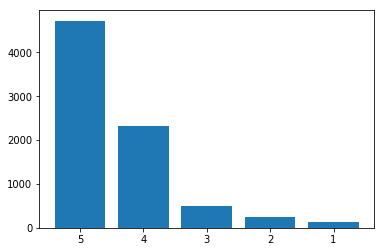

In [61]:
import matplotlib.pyplot as plt

rating = helmets_df["rating"].value_counts()
plt.bar(rating.keys(), rating.values)
plt.show()

In terms of categories, it was easy to find reviews in full face and modular helmets, but not that easy in snow or dirt helmets. Of special interest is dirt category because in the webpage more than 700 products were available, but only 116 reviews were found. 

As a consequence, the whole process of collecting the data from this category was revisited and no problems were found in the code. What happens here, is that there are a lot of versions of the same helmet and therefore some of them do not have reviews.

In the following table and figure can be seen that most of the reviews are from helmets that belong to the full face category, followed by helmets that belong to modular and dual categories. This is actually an intuitive result because full face helmets are the most safe in the market. 

Within this category, 63% of the reviews were rated with 5 stars, 29% were rated with 4 stars, and the remaining 8% of the reviews were rated with 1 to 3 stars. A similar behavior can be found in all categories.

In [89]:
# Proportion of stars within each category
pd.crosstab(index = helmets_df["category"], columns = helmets_df["rating"], normalize = 'index')

rating,1,2,3,4,5
category,,,,,
dirt,0.008621,0.008621,0.008621,0.327586,0.646552
dual,0.021341,0.040650,0.084350,0.335366,0.518293
full_face,0.012494,0.023306,0.049015,0.285920,0.629265
half_df,0.010606,0.025758,0.063636,0.301515,0.598485
modular,0.028475,0.042712,0.092881,0.282034,0.553898
open_face,0.029644,0.037549,0.069170,0.282609,0.581028
snow,0.033333,0.066667,0.033333,0.366667,0.500000


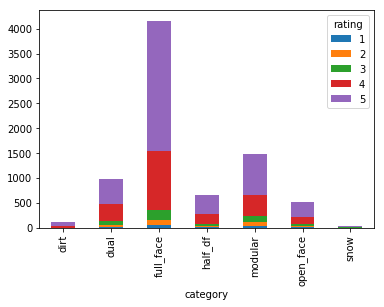

In [92]:
table2 = pd.crosstab(index = helmets_df["category"], columns = helmets_df["rating"], margins = True)
table2_1 = table2.drop('All',axis=1)
table2_1 = table2_1.drop('All',axis=0)
table2_1.plot.bar(stacked=True)

With respect to the number of reviews grouped by brand, the following table shows the top 10. Surprisingly, brands as AGV and ARAI do not appear in this top, even though riders of MOTOGP competition use them. A possible explanation to this, is that usually the price of these products is way above the average and only few riders can afford them. 

On the other hand, it is nice to see that SHOEI, a Japanese company, is in the top. This brand is known by their high quality finish, nice materials and full protection in their helmets. Scorpion, Icon and Bell are also well known brands and this top shows it.

In [94]:
table_brand = pd.crosstab(index = helmets_df["brand"],  columns="count") 
table_brand.sort_values(by = 'count', ascending = False).head(10)

col_0,count
brand,
Shoei,1136
Scorpion,1046
Icon,980
Bell,882
HJC,666
Schuberth,566
Biltwell,413
AFX,363
GMax,314


Now, in terms of how each brand was rated, the following table and figure present the corresponding frequencies. It is important to highlight that 75% of the reviews made to SHOEI products were rated with 5 stars, and 63% of the reviews made to HJC and Biltwell products were also rated with 5 stars. The proportion of 5 stars in other brands is around 50%, so it can be concluded that these three brands are doing a good job in making their customers happy.
        

In [95]:
table_brand_rat = pd.crosstab(index = helmets_df["brand"],  columns = helmets_df["rating"], margins = True) 
table_brand_rat_sub = table_brand_rat.sort_values(by = 'All', ascending = False).head(11)
table_brand_rat_sub.drop('All',axis=0)

rating,1,2,3,4,5,All
brand,,,,,,
Shoei,8,16,40,215,857,1136
Scorpion,15,41,74,371,545,1046
Icon,15,20,52,302,591,980
Bell,12,35,63,279,493,882
HJC,6,10,26,206,418,666
Schuberth,18,25,73,96,354,566
Biltwell,4,7,21,122,259,413
AFX,8,16,29,142,168,363
GMax,9,7,16,118,164,314


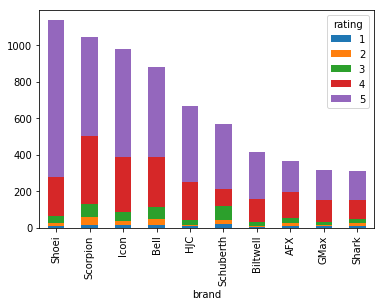

In [97]:
table_brand_rat_sub1 = table_brand_rat_sub.drop('All',axis=0)
table_brand_rat_sub1 = table_brand_rat_sub1.drop('All',axis=1)
table_brand_rat_sub1.plot.bar(stacked=True)

It is therefore of interest to know what the customers are saying about these 3 brands. To do this, three different datasets are created by filtering each brand that we are interested in. Then, the corresponding reviews are joined into a single string and a word cloud is presented.

In [103]:
#pip install wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [99]:
shoei_df = helmets_df[helmets_df.brand == 'Shoei']
hjc_df = helmets_df[helmets_df.brand == 'HJC']
biltwell_df = helmets_df[helmets_df.brand == 'Biltwell']

In [100]:
# Adding stopwords to the list of stopwords
stopwords = set(STOPWORDS)
stopwords.update(["helmet", "ve"])

It seems that Shoei customers are happy with the fit, the visor, the shield, the air flow, among others.

In [106]:
text = " ".join(review for review in shoei_df.review)
wordcloud = WordCloud(stopwords=stopwords, max_words=100, background_color="white").generate(text)

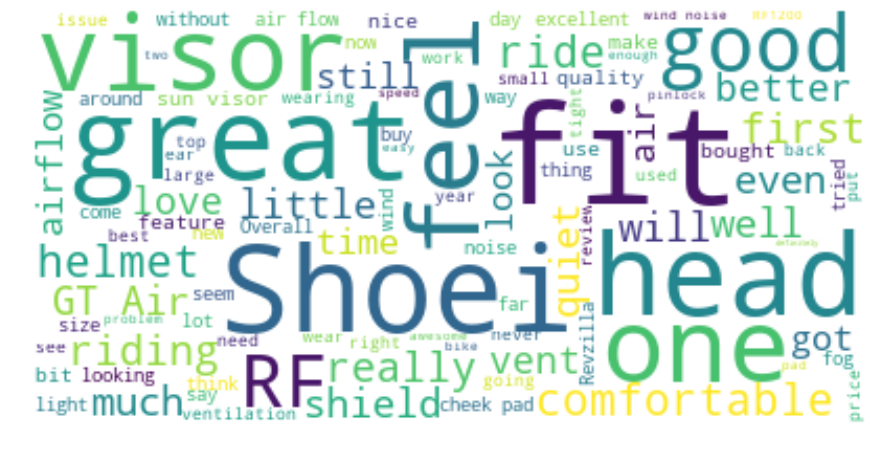

In [111]:
# Display the generated image:
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

HJC users also talk a lot about the fit, visor, shield and it seems that they feel comfortable and are happy with the look.

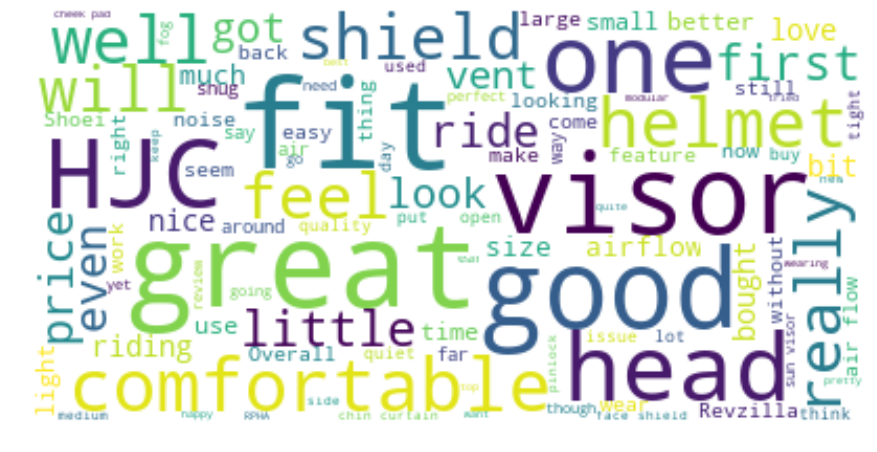

In [113]:
text = " ".join(review for review in hjc_df.review)
wordcloud = WordCloud(stopwords=stopwords, max_words=100, background_color="white").generate(text)
# Display the generated image:
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

As it is expected, Biltwell users talk a lot about the look and the fit of the helmet. This brand is known by its model called Gringo, which is an old-school look helmet.

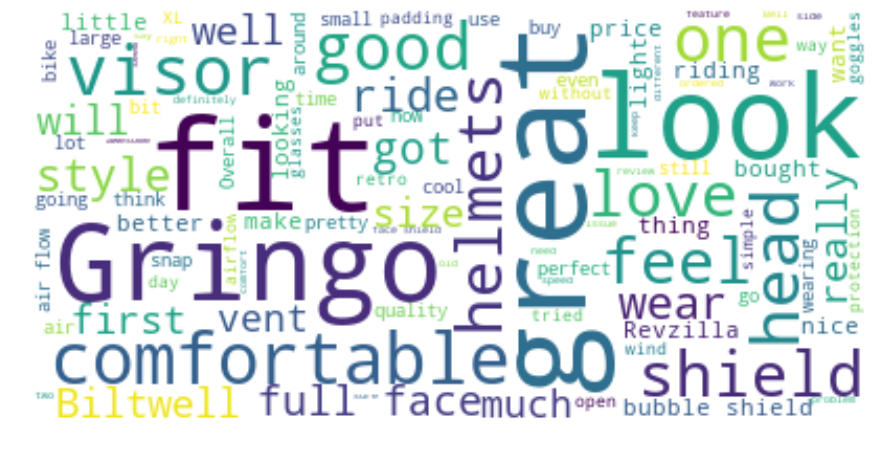

In [115]:
text = " ".join(review for review in biltwell_df.review)
wordcloud = WordCloud(stopwords=stopwords, max_words=100, background_color="white").generate(text)
# Display the generated image:
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Now it is time to analyze the frequency of words in each category and brand.

### Word frequencies

The first step is to make a new column in the dataframe with the corresponding number of words in the review. This is conducted by creating the function `word_count` and applying it to the review.

In [116]:
def word_count(text_string):
    '''Calculate the number of words in a string'''
    return len(text_string.split())

In [117]:
helmets_df['review_word_count'] = helmets_df['review'].apply(word_count)

On average there are 112 words per review, the minimum number of words in a review is 1 and the maximum number is 1231. The median number of words is 79.

In [118]:
helmets_df['review_word_count'].describe()

count    7933.000000
mean      112.755830
std       113.118396
min         1.000000
25%        39.000000
50%        79.000000
75%       144.000000
max      1231.000000
Name: review_word_count, dtype: float64

The distribution of the number of words in the whole dataset is skewed to the right. Actually, the number of reviews with more than 600 words is really small.

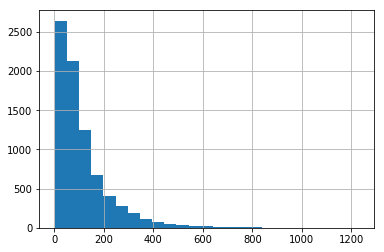

In [119]:
helmets_df['review_word_count'].hist(bins = 25)

The first 10 reviews with the smallest number of reviews is presented. 

In [120]:
helmets_df.sort_values(by='review_word_count').head(10)

,brand,product,rating,title,review,date,category,review_word_count
6953,Shark,Shark Drak Helmet,4,ygyugu,byygyugyguyhbjbhbjbbhbbhbjhbhjbhbhbhbjbbhjbbjb...,2015-01-09,open_face,1
3647,Arai,Arai Quantum-X Sting Helmet,5,Nice,Nice????????????????????????????????,2019-05-26,full_face,1
6259,AFX,AFX FX-41 DS Helmet,5,A+,A+++++++++++++++++++++++++++++++++++++++++++++...,2019-04-03,dual,1
5804,Shoei,Shoei Hornet X2 Helmet - Solid,4,good helmet,nice and confortable.............................,2016-06-21,dual,3
7927,GMax,GMax GM65 Flame Helmet,5,NaN,Nice helmet fast delivery,2018-04-10,half_df,4
7122,Bell,Bell Custom 500 Carbon RSD Jager Helmet,5,NaN,Great finish and quality.,2019-05-25,open_face,4
7384,HJC,HJC IS-Cruiser Helmet,4,Crusier helmet,Fits perfect and comfortable,2017-07-18,half_df,4
7718,Fly,Fly Racing Street 9mm Ghost Skull Helmet,5,Great,Great fit and comfortable!,2019-04-09,half_df,4
1218,Scorpion,Scorpion EXO-R420 Helmet,5,scorpian exo r420,"fast shipping, good helmet",2019-04-13,full_face,4
4469,Schuberth,Schuberth C4 Helmet (XS and SM),5,GOOD,VISOR IS KIND OF DEFECTIVE,2018-12-17,modular,5


The first 10 reviews with the largest number of reviews is also presented. 

In [121]:
helmets_df.sort_values(by='review_word_count', ascending = False).head(10)

,brand,product,rating,title,review,date,category,review_word_count
4139,LS2,LS2 Stream Omega Helmet,5,"Dollar-for-dollar, a darn good deal! The featu...",This review is for the LS2 Stream Omega helmet...,2016-05-16,full_face,1231
1156,Shoei,Shoei GT-Air Helmet - Solid,5,Pricey but worht it.,I just received one of the brand new Shoei GT ...,2013-02-26,full_face,1026
5138,Shark,Shark Evoline 3 ST Hakka Helmet,5,The one; the ONLY,I usually don't write reviews but this helmet ...,2015-07-06,modular,1005
4736,Schuberth,Schuberth C3 Pro Helmet - Solid,2,"Expensive, and I'm not sure it's value for mon...",Review summary:- Expensive- Poor ventilation- ...,2014-07-28,modular,916
5080,AGV,AGV Sportmodular Carbon Helmet,4,"Beautiful design, incredibly light, bad chin s...",The quick summary for those that don't want to...,2019-01-18,modular,891
1169,Shoei,Shoei X-14 Helmet - Solids,5,Great as a Touring / Street Helmet Too!,"I have an oddly shaped head: It is ""ice cream ...",2017-04-12,full_face,872
6285,AFX,AFX FX-41 DS Helmet,3,"It'll keep your head in one piece, probably, b...",I've had this helmet for about 2 years now and...,2017-01-25,dual,848
2242,Bell,Bell Bullitt Helmet,4,A little pricey but there's nothing else like it,I went through a lot of different emotions whe...,2014-06-20,full_face,841
4171,AGV,AGV Sportmodular Carbon Solid Helmet,5,"The more I use it, the more I like it",Picked up am AGV SM in the White/Carbon flavor...,2018-08-25,modular,832
4184,AGV,AGV Sportmodular Carbon Solid Helmet,4,"More PROS then CONS, but the con can be a factor",Just got my new Sport Modular. I am an avid AG...,2018-04-09,modular,825


It seems that there is a difference in the length of the reviews from one category to the other. In general, full face, dual and modular helmets tend to have longer reviews than any other category.

In [128]:
# Describe by category
print(helmets_df.groupby('category')['review_word_count'].describe().reset_index())

    category   count        mean         std  min    25%   50%     75%     max
0       dirt   116.0   57.474138   48.285647  6.0  20.75  46.5   78.00   245.0
1       dual   984.0  133.670732  122.265938  1.0  48.75  98.0  174.25   848.0
2  full_face  4162.0  111.671072  109.713339  1.0  40.00  79.0  144.00  1231.0
3    half_df   660.0   68.931818   65.434905  4.0  25.00  52.0   91.00   640.0
4    modular  1475.0  134.093559  132.393653  5.0  45.50  94.0  177.00  1005.0
5  open_face   506.0   91.045455   95.774487  1.0  29.00  61.0  117.75   820.0
6       snow    30.0   72.200000   69.479543  8.0  27.75  53.5   92.00   369.0


In terms of brand, the top 10 of brands with longer reviews is totally different than the top 10 of more reviews. Brands like X-lite, MSR or Klim are not very known in the industry.

In [131]:
# Describe by brand
print(helmets_df.groupby('brand')['review_word_count'].describe().reset_index().sort_values(by='mean', ascending = False))

          brand   count        mean         std   min    25%    50%     75%  \
35       X-Lite     4.0  318.750000  345.535695  78.0  89.25  190.0  419.50   
20          MSR     3.0  264.666667  310.406722  53.0  86.50  120.0  370.50   
17         Klim    49.0  181.285714  143.774128   8.0  78.00  163.0  239.00   
27         Sena    23.0  179.956522  179.105220  13.0  70.50  112.0  240.00   
21         Nexx   128.0  155.835938  122.528722   7.0  57.75  120.5  231.25   
10          EVS     4.0  148.000000  155.007527  42.0  60.00   86.5  174.50   
18          LS2   167.0  139.197605  152.782633   5.0  41.00  100.0  186.50   
24    Schuberth   566.0  137.181979  121.523254   5.0  50.00  105.0  191.75   
22        Nolan   114.0  129.210526  113.389646   5.0  49.25   98.5  168.00   
1            6D     5.0  128.800000  101.065325  15.0  55.00  129.0  173.00   
29        Shoei  1136.0  128.081866  125.138786   3.0  47.00   90.0  161.00   
25     Scorpion  1046.0  124.515296  118.742402   4.

To complement the analysis of the word clouds made before, the frequency of each word is computed in the whole dataset.

In [132]:
# Import function
from sklearn.feature_extraction.text import CountVectorizer

The first step is to create a vocabulary with the most frequent words in the dataset. In this case, all text is transformed to lowercase, english stopwords are removed, and words which document frequency is higher than 99% or smaller than 2% are ignored.

In [145]:
vectorizer = CountVectorizer(lowercase    = True,
                             stop_words   = 'english',
                             max_df       = .99,
                             min_df       = .02)

In [146]:
# Create dictionary
vectorizer.fit(helmets_df['review'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.99, max_features=None, min_df=0.02,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In total 431 words are considered in the vocabulary. Although it seems like a small number, it is consistent with the number of words per review

In [151]:
len(vectorizer.get_feature_names())

431

Once the vocabulary is built, a dataframe is created where the columns represent the words of the vocabulary and rows represent which words were present in the review.

In [147]:
features = vectorizer.transform(helmets_df['review'])

In [148]:
word_freq_df = pd.DataFrame(features.toarray(),
                            columns = vectorizer.get_feature_names(),
                            index = helmets_df.index)

In [149]:
word_freq_df.head()

,10,100,1200,50,500,able,absolutely,actually,ago,agv,...,wore,work,works,worn,worth,wouldn,wrong,xl,year,years
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The top 20 of the most frequent words is presented. _Helmet_ is of course the first word because these reviews are about helmets. Characteristics of the helmet, such as visor, shield, chin, are mentioned. Usual topics related to helmets such as face, air, noise, price are also mentioned frequently.

In [153]:
word_freq_df.sum().sort_values(ascending=False).head(20)

helmet         20544
great           4915
visor           4791
like            3662
fit             3485
head            3345
good            3191
just            2718
shield          2694
face            2505
helmets         2422
air             2323
comfortable     2271
really          2193
little          2052
noise           1959
riding          1938
ve              1869
price           1844
chin            1808
dtype: int64

This same process of creating a vocabulary from the corpus and obtain a frequency for each word can be repeated by adding some weights to the count. This methodology is called term-frequency/inverse document frequency, or TF-IDF. 
As before, the vocabulary is created under the same considerations mentioned above, and then analyzed.

In [135]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [136]:
tfidf_vectorizer = TfidfVectorizer(lowercase    = True,
                                   stop_words   = 'english',
                                   max_df       = .99,
                                   min_df       = .02)

In [137]:
# Create dictionary
tfidf_vectorizer.fit(helmets_df['review'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.99, max_features=None, min_df=0.02,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

As before, the number of words in the vocabulary is the same

In [138]:
len(tfidf_vectorizer.get_feature_names())

431

In [162]:
features_tfidf = tfidf_vectorizer.transform(helmets_df['review'])

In [163]:
word_freq_tfidf_df = pd.DataFrame(features_tfidf.toarray(),
                            columns = tfidf_vectorizer.get_feature_names(),
                            index = helmets_df.index)

The top 20 is very similar, although some words have more weight than before, like comfortable.

In [164]:
word_freq_tfidf_df.sum().sort_values(ascending=False).head(20)

helmet         1066.220147
great           506.361016
visor           391.414456
good            354.376222
fit             340.931436
like            324.556414
head            302.785226
comfortable     288.163737
shield          270.342749
face            254.308996
just            252.108157
love            249.434686
helmets         243.624772
price           242.992966
really          241.765092
looks           240.396042
fits            237.918685
little          235.084935
air             233.691773
noise           207.092803
dtype: float64

From a descriptive perspective, it can be concluded that most of the reviews were rated with 5 stars. Full face, modular and dual categories are the ones with the largest number of reviews. The number of words per review was, on average, about 112, although this average was different for each category. Shoei, HJC and Biltwell were the brands with the highest proportion reviews rated with 5 stars, and in most of them the visor, the fit and the shield were the most common topics.

### Classification techniques

In modelling it is always a good idea to split the dataset into training and test subsets to evaluate the performance of the model in terms of new data. As a consequence, the training dataset is used to create the vocabulary, make the feature extraction and fit the model, and the test set is only used to measure the accuracy of the predictions.

For this reason, the first step consists in creating a training and test dataset from the entire dataset. Note that a seed is set in the function to obtain reproducible results.

In [170]:
helmets_df = pd.read_csv("helmets_reviews.csv") 

In [171]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(helmets_df, test_size=0.7, random_state = 12345)

There are different ways to extract features from the data: **Bag of words**, which consists in the frequency of each word, is frequently used. **TF-IDF**, which gives a weight to each term in each review, penalizes terms that occur frequently in the whole corpus and rewards terms that occur frequently in the review. **Word2Vec**, which converts each term to a vector representation by means of neural network models.

In this case, the first two approaches are considered by creating a vocabulary in the training set and applying it to the test set to make the evaluation of the performance of the model.

To create the vocabulary, the same considerations mentioned before are applied here.

In [172]:
vectorizer = CountVectorizer(lowercase   = True,
                             stop_words  = 'english',
                             max_df       = .99,
                             min_df       = .02,
                             max_features = None)

In [173]:
vectorizer.fit(train['review'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.99, max_features=None, min_df=0.02,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

The text data is then transformed into frequencies:

In [174]:
X_train = vectorizer.transform(train['review'])

The first model considered is the multinomial Naive Bayes classifier, which is suitable for multiclass classification and offers usually good performance in the analysis of text data.

In [175]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()

The model is trained using the frequencies of each word and defining as a response variable the number of stars.

In [176]:
nb_classifier.fit(X_train, train['rating'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

The accuracy can be measured by the proportion of reviews that were correctly classified by the model. In this case, 70% of the reviews were correctly classified, but it is more important to check this performance in the test set.

In [177]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(accuracy_score(train['rating'],
                     nb_classifier.predict(X_train)))

0.7023959646910467


The test set is also transformed to word frequencies under the same vocabulary used to train the model. Then, these frequencies are used to predict the number of stars.

In [178]:
test_wf         = vectorizer.transform(test['review'])
test_prediction = nb_classifier.predict(test_wf)

The proportion of reviews correctly classified by the model drops 10% when the test set is used. 

In [180]:
print(accuracy_score(test['rating'], test_prediction))

0.5959668707238026


Another alternative to fit a model consists in fitting a logistic regression model. The same process is repeated with the only difference that the model object changes.

In [185]:
from sklearn.linear_model import LogisticRegression

ln_classifier = LogisticRegression(solver = 'lbfgs', multi_class = 'multinomial', max_iter = 1000)

# Train the model
ln_classifier.fit(X_train, train['rating'] )

# Predict the number of stars on the test set
test_prediction = ln_classifier.predict(test_wf)

In this case the accuracy on the training set increases 9% with respect to the previous model, but the accuracy on the test set remains constant. Therefore, the predictive performance of both models is similar.

In [186]:
print(accuracy_score(train['rating'], ln_classifier.predict(X_train)))
print(accuracy_score(test['rating'], test_prediction))

0.7978142076502732
0.5963269715520346


This whole process of fitting a multinomial Naive Bayes and logistic regression model is repeated but the feature extraction changes. Now TF-IDF is used.

As before, the first step consists in creating the vocabulary from the training set

In [187]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(lowercase    = True,
                                   stop_words   = 'english',
                                   max_df       = .99,
                                   min_df       = .02)

# Create dictionary
tfidf_vectorizer.fit(train['review'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.99, max_features=None, min_df=0.02,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

The original data is then transformed to word frequencies and used to fit the model. This vocabulary is then used to transform the test data, and these frequencies are used to predict the number of stars of each review.

In [188]:
X_train = tfidf_vectorizer.transform(train['review'])

nb_classifier = MultinomialNB()

nb_classifier.fit(X_train, train['rating'])

test_wf         = tfidf_vectorizer.transform(test['review'])
test_prediction = nb_classifier.predict(test_wf)

The accuracy in the training set drops with respect to the models considered before, using bag of words approach. This accuracy is now 62%, which means that 62% of the reviews used to train the model were correctly classified.
However, the performance in the test set increases 0.5% with respect to those models. So it can be concluded that this feature extraction produces slightly better results in terms of predictive performance.

In [189]:
print(accuracy_score(train['rating'],nb_classifier.predict(X_train)))
print(accuracy_score(test['rating'], test_prediction))

0.6263135771332493
0.609830752610731


As before, the whole process is repeated by using a logistic regression model with TF-IDF features. As a result, the accuracy on the training set and the test set increase. 61.8% of the reviews in the test set are correctly classified by the model. Thus, it can be concluded that this model is the best in terms of predictive performance.

In [190]:
ln_classifier = LogisticRegression(solver = 'lbfgs', multi_class = 'multinomial')

# Train the model
ln_classifier.fit(X_train, train['rating'])

# Predict the number of stars on the test set
test_prediction = ln_classifier.predict(test_wf)

print(accuracy_score(train['rating'], ln_classifier.predict(X_train)))
print(accuracy_score(test['rating'], test_prediction))

0.6935687263556116
0.6182931220741807


To conclude, two different approaches were used to extract features from reviews: Bag of words and TF-IDF. With each approach two different models were fitted: a multinomial Naive Bayes model and a logistic regression model. Although the performance of all models was similar, the model with the best predictive performance in the test set was a logistic regression with TF-IDF feature extraction.

## Conclusion

This notebook presented the process to collect reviews data from a motorcycle gear retailer's webpage and analyze them from a descriptive perspective as well as a modelling perspective. Different challenges were encountered in the collection of the data, because the webpage is rendered with **Java Script**. `Selenium` package was used to deal with this problem, by allowing the user to control a _Chrome_ driver from _Python_. Once this problem was solved, 7933 reviews were collected from all kinds of helmets (full face, modular, dual, among others). 

The descriptive analysis of the reviews showed that most of the reviews were rated with 5 stars. Full face, modular and dual categories were the ones with the largest number of reviews. The number of words per review was, on average, about 112, although this average was different for each category. Shoei, HJC and Biltwell were the brands with the highest proportion reviews rated with 5 stars, and in most of them the visor, the fit and the shield were the most common topics.

The modelling analysis led to conclude that even though the performance of all models trained were similar, the model with the best predictive performance in the test set was a logistic regression with TF-IDF feature extraction.